<a href="https://colab.research.google.com/github/surajksharma7/Deep-Learning/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import shap
import xgboost
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:55:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [7]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

In [8]:
shap_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean SHAP Value": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="Mean SHAP Value", ascending=False)

In [9]:
shap_importance

,Feature,Mean SHAP Value
7,mean concave points,1.251806
23,worst area,1.177029
27,worst concave points,0.975928
21,worst texture,0.846842
13,area error,0.787382
26,worst concavity,0.782375
15,compactness error,0.588523
28,worst symmetry,0.420688
1,mean texture,0.419982
18,symmetry error,0.364100


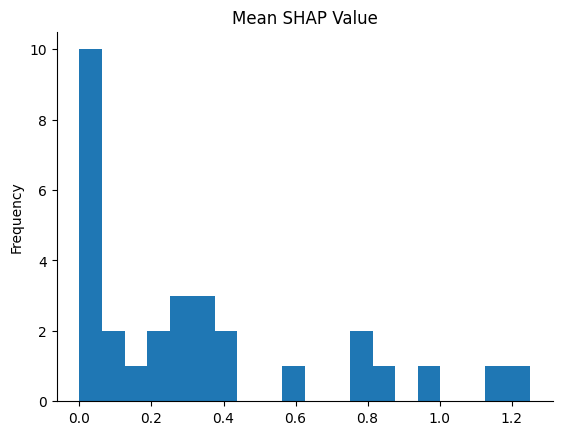

In [10]:
# @title Mean SHAP Value

from matplotlib import pyplot as plt
shap_importance['Mean SHAP Value'].plot(kind='hist', bins=20, title='Mean SHAP Value')
plt.gca().spines[['top', 'right',]].set_visible(False)